# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [145]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [107]:
#Loading Dataset
df=pd.read_csv('loan.csv')

In [108]:
#checking the no of rows and columns
df.shape

(614, 13)

In [109]:
#checking the first 10 rows
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [110]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [111]:
#check features
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have a dataset with 614 observations for 12 features and Target Loan Status, which is a binary variable.

Null values observed in Gender, Married, Dependents, Self Employed, Loan Amount, Loan Term, Credit History attributes.

Of the 12 features, 5 are numeric, rest are categorical.


In [113]:
df['Loan_ID'].nunique()

614

Since LoanID is a unique ID field with each of the 614 values being unique, let us drop this feature from the dataset.

In [114]:
df=df.drop(['Loan_ID'],axis=1)

In [115]:
#checking null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

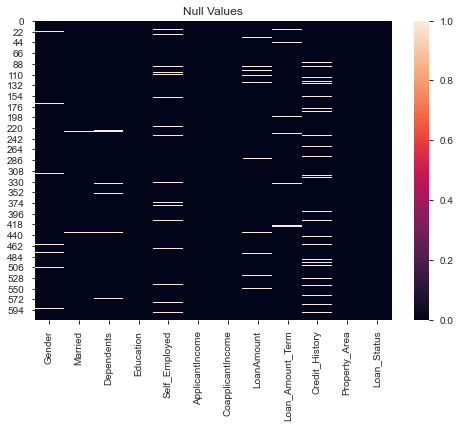

In [116]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [117]:
#let us fill the missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

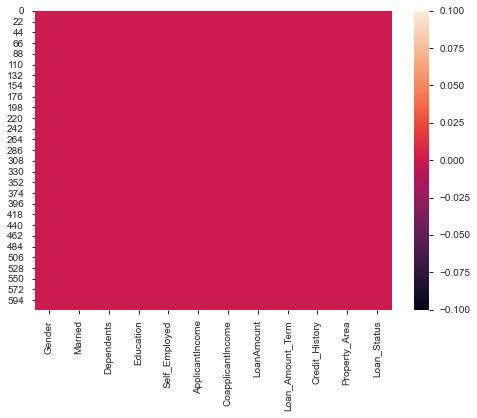

In [118]:
#checking for any missing values post 
sns.heatmap(df.isnull())

# Exploratory Data Analysis

In [119]:
profile=ProfileReport(df,title='Profiling Report')
profile

Here, we can see that the dataset has 4 booleans, 4 categorical and 4 numeric fields.

Applicant Income, Coapplicant Income, Loan Amount data distribution is skewed to the right. 

Loan Term has a left tailed distibution.

Most applicants have credit history, no dependents.. are graduate males who are married but not self employed.

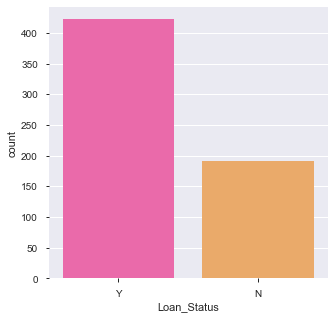

In [120]:
plt.figure(figsize=(5,5))
sns.countplot('Loan_Status',data=df,palette='spring')

The no of applicants whose loan is approved is higher than those that have been rejected.

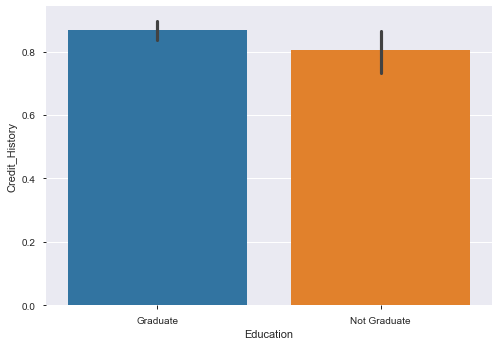

In [121]:
sns.barplot(x="Education",y="Credit_History", data=df)

More Graduates tended to have a credit history as compared to non graduates.

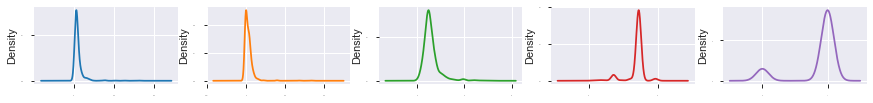

In [122]:
df.plot(kind='density', subplots=True, layout=(6,6), legend=False, sharex=False, fontsize=1, figsize=(18,10)) 
plt.show()

# Data Pre-Processing

In [123]:
#label encoding the data

columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area', 'Loan_Status']

for i in columns:
    LE=LabelEncoder()
    df[i] = LE.fit_transform(df[i])

In [124]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [125]:
#splitting dataframe into x and y
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [126]:
#checking skewness
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [127]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [128]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

In [129]:
x=df_new

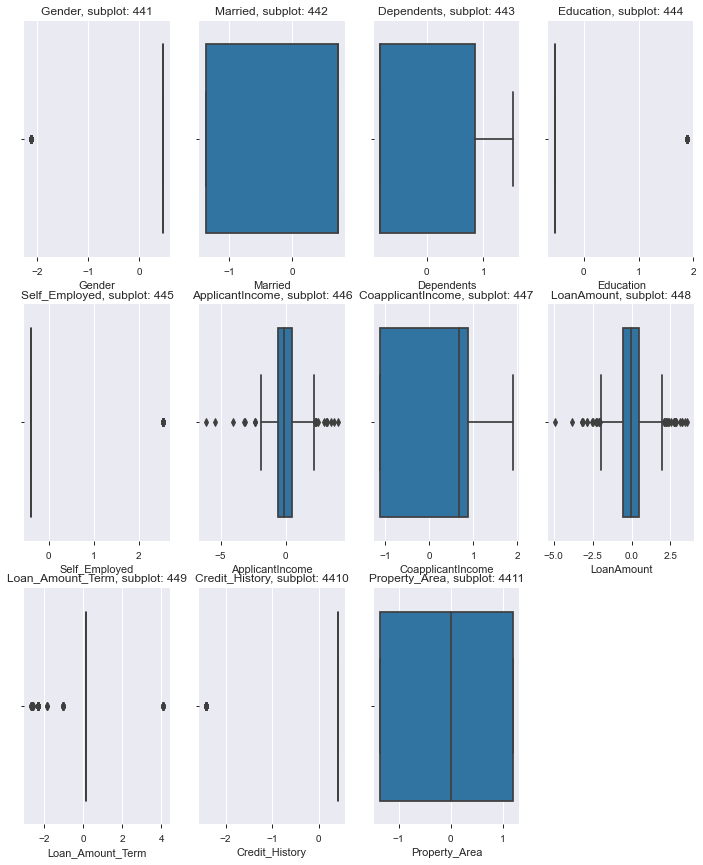

In [130]:
#Outlier check

cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(12,20))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x[i])
    c = c + 1

plt.show()

Points are sighted close to whiskers and are not true outliers. 

In [131]:
#Scale the data in x
std = StandardScaler()
x = std.fit_transform(x)

# Optimal random State

In [132]:
MaxAcc=0
MaxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc= accuracy_score(y_test, predlr)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS=i
print("Highest accuracy acheived at",MaxAcc, "with Random State ", MaxRS)

Highest accuracy acheived at 0.8961038961038961 with Random State  955


In [133]:
#train test split at best random state
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=955)

# Testing Models

In [146]:
models = {"Logistic": LogisticRegression(),
              "Ridge": RidgeClassifier(),
              "KNN": KNeighborsClassifier(),
              "DTC": DecisionTreeClassifier(),
              "RF": RandomForestClassifier(),
              "NB": GaussianNB(),
              "GBM": GradientBoostingClassifier(),
              "XGB": XGBClassifier(),
              "SVM": SVC()}

In [147]:
results = []
model_names = []
scoring = 'accuracy'
for name, model in models.items():
    kfold = model_selection.KFold(n_splits=5, random_state=955)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic: 0.776087 (0.048415)
Ridge: 0.776087 (0.048415)
KNN: 0.739130 (0.040670)
DTC: 0.676087 (0.056018)
RF: 0.754348 (0.040437)
NB: 0.773913 (0.042041)
GBM: 0.763043 (0.031050)
[12:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

We see our best performing model to be : Logistic Regression at 77.61% accuracy.

HyperParameter Tuning

In [150]:
parameters = {'penalty': ['l1','l2'], 
              'C': np.logspace(0,4,10)}

GCV = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=5)

In [151]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [153]:
GCV.best_params_, GCV.best_score_

({'C': 1.0, 'penalty': 'l2'}, 0.773913043478261)

In [154]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [155]:
accuracy_score(y_test,GCV_pred)

0.8961038961038961

# Saving the Best Model

In [156]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan.pkl")

['Loan.pkl']